While editing this notebook, don't change cell types as that confuses the autograder.

Before you turn this notebook in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Carmen Pelayo Fernández"

_Understanding Deep Learning_

---

<a href="https://colab.research.google.com/github/DL4DS/sp2024_notebooks/blob/main/release/nbs10/10_1_1D_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 10.1: 1D Convolution

This notebook investigates 1D convolutional layers.

Adapted from notebooks at https://github.com/udlbook/udlbook.

> Note: A convolutional filter with no spaces between the elements (i.e. a normal filter without dilation) as denoted as having dilation of one.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Define a Signal

In [3]:
# Define a signal that we can apply convolution to
x = [5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 3.1]

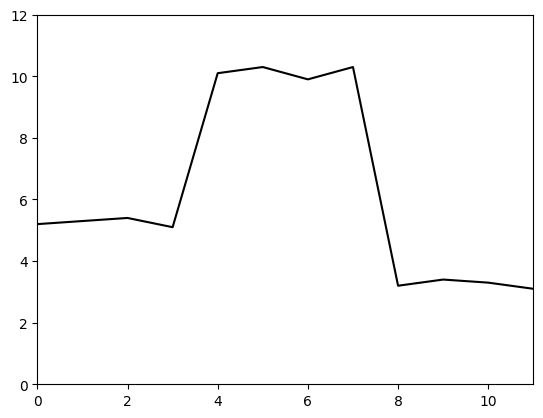

In [4]:
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
plt.show()

## A 3/1/1 Convolution

- kernel size: 3
- stride: 1
- dilation: 1

In [5]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 1
# as in figure 10.2a-c.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_1_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    for i in range(len(x_in)):
        if i == 0:
            x_out[i] = x_in[i] * omega[1] + x_in[i+1] * omega[2]
        elif i == len(x_in) - 1:
            x_out[i] = x_in[i-1] * omega[0] +  x_in[i] * omega[1]
        else:
            x_out[i] = x_in[i-1] * omega[0] + x_in[i] * omega[1] + x_in[i+1] * omega[2]
    return x_out

Now let's see what kind of things convolution can do
First, it can average nearby values, smoothing the function:

Sum of output is 71.1, should be 71.1


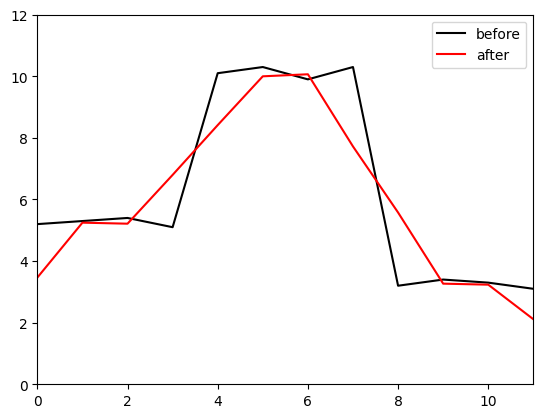

In [6]:

omega = [0.33,0.33,0.33]
h = conv_3_1_1_zp(x, omega)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h):3.3}, should be 71.1")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [7]:
assert np.isclose(np.sum(h), 71.1, atol=0.1), "Sum of output is not correct"

Notice how the red function is a smoothed version of the black one as it has averaged adjacent values.  The first and last outputs are considerably lower than the original curve though.  Make sure that you understand why!<br><br>

With different weights, the convolution can be used to find sharp changes in the function:

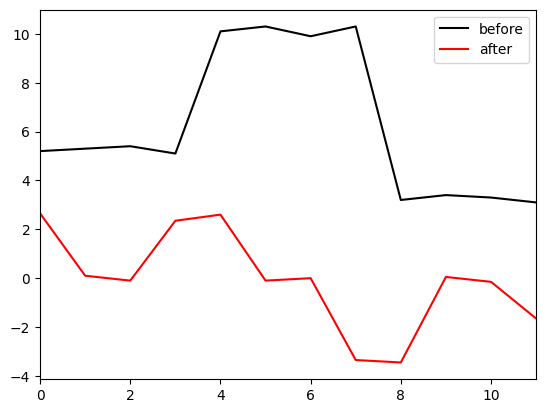

In [8]:
omega = [-0.5,0,0.5]
h2 = conv_3_1_1_zp(x, omega)

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h2, 'r-',label='after')
ax.set_xlim(0,11)
# ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [9]:
assert np.isclose(np.sum(h2), -1.05, atol=0.1), "Sum of output is not correct"

Notice that the convolution has a peak where the original function went up and trough where it went down.  It is roughly zero where the function is locally flat.  This convolution approximates a derivative.


## A 3/2/1 Convolution

Now let's define the convolutions from figure 10.3.  

* kernel size: 3
* stride: 2
* dilation: 1

In [10]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 2, and a dilation of 1
# as in figure 10.3a-b.  Write it yourself, don't call a library routine!
def conv_3_2_1_zp(x_in, omega):
    x_out = np.zeros((len(x_in) + 1) // 2)
    for i in range(len(x_out)):
        idx = 2 * i
        if idx == 0:
            x_out[i] = x_in[idx] * omega[1] + x_in[idx + 1] * omega[2]
        elif idx >= len(x_in) - 1:
            x_out[i] = x_in[idx - 1] * omega[0] + x_in[idx] * omega[1]
        else:
            x_out[i] = x_in[idx - 1] * omega[0] + x_in[idx] * omega[1] + (x_in[idx + 1] if idx + 1 < len(x_in) else 0) * omega[2]
    return x_out

In [11]:
omega = [0.33,0.33,0.33]
h3 = conv_3_2_1_zp(x, omega)

# If you have done this right, the output length should be six and it should
# contain every other value from the original convolution with stride 1
print(h)
print(h3)

[ 3.465  5.247  5.214  6.798  8.415  9.999 10.065  7.722  5.577  3.267
  3.234  2.112]
[ 3.465  5.214  8.415 10.065  5.577  3.234]


In [12]:
assert np.allclose(h[::2], h3), "Output is not correct"

## A 5/1/1 Convolution

* kernel size: 5
* stride: 1
* dilation: 1

In [13]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 5, a stride of 1, and a dilation of 1
# as in figure 10.3c.  Write it yourself, don't call a library routine!
def conv_5_1_1_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    for i in range(len(x_in)):
        if i == 0:
            x_out[i] = x_in[i] * omega[2] + x_in[i+1] * omega[3] + x_in[i+2] * omega[4]
        elif i == 1:
             x_out[i] = x_in[i-1] * omega[1] + x_in[i] * omega[2] + x_in[i+1] * omega[3] + x_in[i+2] * omega[4]
        elif i == len(x_in) - 2:
            x_out[i] = x_in[i-2] * omega[0] + x_in[i-1] * omega[1] + x_in[i] * omega[2] + + x_in[i+1] * omega[3]
        elif i == len(x_in) - 1:
            x_out[i] = x_in[i-2] * omega[0] + x_in[i-1] * omega[1] + x_in[i] * omega[2] 
        else:
            x_out[i] = x_in[i-2] * omega[0] + x_in[i-1] * omega[1] + x_in[i] * omega[2] + x_in[i+1] * omega[3] + x_in[i+2] * omega[4]
    return x_out

Sum of output is 69.6, should be 69.6


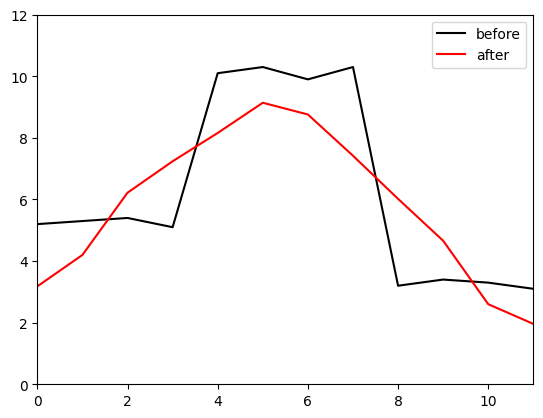

In [14]:

omega2 = [0.2, 0.2, 0.2, 0.2, 0.2]
h4 = conv_5_1_1_zp(x, omega2)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h4):3.3}, should be 69.6")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h4, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [15]:
assert np.isclose(np.sum(h4), 69.6, atol=0.1), "Sum of output is not correct"

## A 3/1/2 Convolution

* kernel size: 3
* stride: 1
* dilation: 2

In [16]:
# Finally let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 2
# as in figure 10.3d.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_2_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    for i in range(len(x_in)):
        if i == 0:
            x_out[i] = x_in[i] * omega[1] + x_in[i+2] * omega[2]
        elif i >= len(x_in) - 3:
            x_out[i] = x_in[i-2] * omega[0] +  x_in[i] * omega[1]
        else:
            x_out[i] = x_in[i-2] * omega[0] + x_in[i] * omega[1] + x_in[i+2] * omega[2]
    return x_out

Sum of output is 68.3, should be 68.3


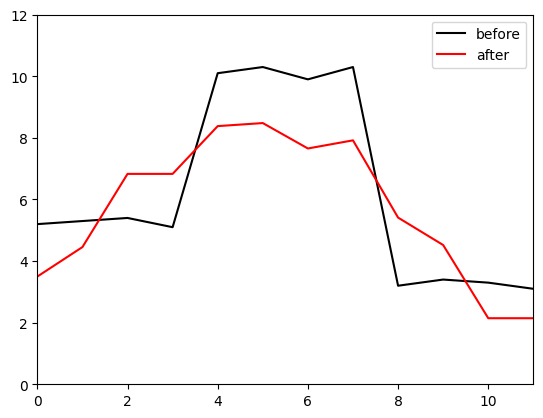

In [17]:
omega = [0.33,0.33,0.33]
h5 = conv_3_1_2_zp(x, omega)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h5):3.3}, should be 68.3")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h5, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [18]:
assert np.isclose(np.sum(h5), 68.3, atol=0.1), "Sum of output is not correct"

## Convolutions as Matrices

Finally, let's investigate representing convolutions as full matrices, and show we get the same answer.

In [19]:
# Compute matrix in figure 10.4 d
def get_conv_mat_3_1_1_zp(n_out, omega):
    omega_mat = np.zeros((n_out, n_out))
    for i in range(n_out):
        for j in range(max(0, i - 1), min(n_out, i + 2)):
            omega_mat[i, j] = omega[j - i + 1] if 0 <= j - i + 1 < len(omega) else 0
    return omega_mat

In [20]:
# Run original convolution
omega = np.array([-1.0,0.5,-0.2])
h6 = conv_3_1_1_zp(x, omega)
print(h6)

# If you have done this right, you should get the same answer
omega_mat = get_conv_mat_3_1_1_zp(len(x), omega)
h7 = np.matmul(omega_mat, x)
print(h7)


[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]
[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]


In [21]:
assert np.allclose(h6, h7), "Output is not correct"

In [22]:
print(omega_mat)

[[ 0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5]]


TODO:  What do you expect to happen if we apply the last convolution twice?  Can this be represented as a single convolution?  If so, then what is it?

The omega matrix will convolve with itself. Therefore, applying the convolution to the signal matrix twice is equivalent to applying a convolved omega to the original signal matrix. To convolve the omega matrix with itself, we'll multiply omega by itself, resulting in an omega of kernel size=5.

In [23]:
# Apply the matrix to x twice
h7 = np.matmul(omega_mat, x)   # recalculate h7
h8 = np.matmul(omega_mat, h7)
print(h8)

# Create an omega_mat2 that when applied to x gives the same results as convolving
# omega_mat with x twice.
omega_mat2 = np.matmul(omega_mat, omega_mat)

h9 = np.matmul(omega_mat2, x)
print(h9)

h6 = conv_3_1_1_zp(x, omega)  # recalculate h6
h10 = conv_3_1_1_zp(h6, omega)
print(h10)

[ 1.496 -2.631  2.794  1.607  5.201  0.127  4.303  6.591  1.132  8.774
  1.325  1.495]
[ 1.496 -2.631  2.794  1.607  5.201  0.127  4.303  6.591  1.132  8.774
  1.325  1.495]
[ 1.496 -2.631  2.794  1.607  5.201  0.127  4.303  6.591  1.132  8.774
  1.325  1.495]


In [24]:
assert np.allclose(h8, h9), "Output is not correct"

In [25]:
print(omega_mat2)

[[ 0.45 -0.2   0.04  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.    0.65 -0.2   0.04  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.   -1.    0.65 -0.2   0.04  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.   -1.    0.65 -0.2   0.04  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.   -1.    0.65 -0.2   0.04  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.   -1.    0.65 -0.2   0.04  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.   -1.    0.65 -0.2   0.04  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.   -1.    0.65 -0.2   0.04  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -1.    0.65 -0.2   0.04  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.   -1.    0.65 -0.2   0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -1.    0.65 -0.2 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -1.    0.45]]
